# "지하철 이용승객 분석" EDA 프로젝트
## 실습 데이터 
- 지하철 승하자 이용객 데이터 : 2019.01.01 ~ 2019.06.30 
  - 서울열린데이터광장 :  http://data.seoul.go.kr/dataList/OA-12914/A/1/datasetView.do
- 지하철 노선 정보 데이터

In [30]:
# 필요한 라이브러리를 불러오기

import pandas as pd
import numpy as np

In [31]:
# 작업할 여러개의 파일 중 하나의 파일 불러오기

file = r'.\data\rawfiles\CARD_SUBWAY_MONTH_201901.csv' #r은 raw 그대로 특수문자도 그대로 다 읽어오기

pd.read_csv(file)

,사용일자,노선명,역명,승차총승객수,하차총승객수,등록일자
0,20190101,2호선,을지로4가,3862.0,3728.0,20190104
1,20190101,3호선,을지로3가,8104.0,7554.0,20190104
2,20190101,2호선,을지로입구,22478.0,21330.0,20190104
3,20190101,2호선,시청,8381.0,6049.0,20190104
4,20190101,6호선,동묘앞,8045.0,8504.0,20190104
...,...,...,...,...,...,...
18329,20190131,우이신설경전철,북한산보국문,6195.0,5786.0,20190203
18330,20190131,우이신설경전철,정릉,4600.0,4211.0,20190203
18331,20190131,4호선,성신여대입구,3922.0,4289.0,20190203
18332,20190131,6호선,보문,1659.0,1693.0,20190203


In [32]:
raw = pd.read_csv(file)
raw.head()

,사용일자,노선명,역명,승차총승객수,하차총승객수,등록일자
0,20190101,2호선,을지로4가,3862.0,3728.0,20190104
1,20190101,3호선,을지로3가,8104.0,7554.0,20190104
2,20190101,2호선,을지로입구,22478.0,21330.0,20190104
3,20190101,2호선,시청,8381.0,6049.0,20190104
4,20190101,6호선,동묘앞,8045.0,8504.0,20190104


In [33]:
# info() 이용해 데이터 구조를 살펴보기

raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18334 entries, 0 to 18333
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   사용일자    18334 non-null  int64  
 1   노선명     18334 non-null  object 
 2   역명      18334 non-null  object 
 3   승차총승객수  18334 non-null  float64
 4   하차총승객수  18334 non-null  float64
 5   등록일자    18334 non-null  int64  
dtypes: float64(2), int64(2), object(2)
memory usage: 859.5+ KB


In [34]:
# 이번에 여러 파일을 불러오기
# 2개 파일 불러와서 합치기

raw = pd.DataFrame()
raw.head()

file1 = r'.\data\rawfiles\CARD_SUBWAY_MONTH_201901.csv'
file2 = r'.\data\rawfiles\CARD_SUBWAY_MONTH_201902.csv'

temp1 = pd.read_csv(file1)
temp2 = pd.read_csv(file2)

# pandas concat 합치때, 인덱스 번호 그래로 간다. 옵션 ignore_index=True 사용하면 인덱스 새로 생성
raw = pd.concat([temp1, temp2], axis=0) # 0 : 행방향 , 1 : 열방향, default : 0

raw

,사용일자,노선명,역명,승차총승객수,하차총승객수,등록일자
0,20190101,2호선,을지로4가,3862.0,3728.0,20190104
1,20190101,3호선,을지로3가,8104.0,7554.0,20190104
2,20190101,2호선,을지로입구,22478.0,21330.0,20190104
3,20190101,2호선,시청,8381.0,6049.0,20190104
4,20190101,6호선,동묘앞,8045.0,8504.0,20190104
...,...,...,...,...,...,...
16538,20190228,2호선,을지로4가,6128.0,7087.0,20190303
16539,20190228,2호선,동대문역사문화공원,3387.0,4061.0,20190303
16540,20190228,5호선,청구,4920.0,4474.0,20190303
16541,20190228,1호선,가산디지털단지,51729.0,52043.0,20190303


In [35]:
# 폴더/파일을 관리하는 os 라이브러리를 불러오기

import os

In [36]:
# os.listdir()을 이용해 폴더에 있는 파일 리스트를 살펴보기

os.listdir()


['1.지하철 이용승객 분석 EDA 프로젝트(1).ipynb',
 'Assignment.ipynb',
 'data',
 'subway_raw.csv']

In [37]:
dirpath = './data/rawfiles'
os.listdir(dirpath)

['CARD_SUBWAY_MONTH_201901.csv',
 'CARD_SUBWAY_MONTH_201902.csv',
 'CARD_SUBWAY_MONTH_201903.csv',
 'CARD_SUBWAY_MONTH_201904.csv',
 'CARD_SUBWAY_MONTH_201905.csv',
 'CARD_SUBWAY_MONTH_201906.csv',
 '지하철노선위경도정보2.csv']

In [38]:
dirpath = './data/rawfiles/'
files = os.listdir(dirpath)
files = files[0:6]
files

['CARD_SUBWAY_MONTH_201901.csv',
 'CARD_SUBWAY_MONTH_201902.csv',
 'CARD_SUBWAY_MONTH_201903.csv',
 'CARD_SUBWAY_MONTH_201904.csv',
 'CARD_SUBWAY_MONTH_201905.csv',
 'CARD_SUBWAY_MONTH_201906.csv']

In [39]:
# 여러개 파일 병합

# 빈 데이터프레임을 준비
raw = pd.DataFrame()

# 반복문 -> csv 파일 읽기 -> 데이터프레임에 추가하기
for file in files:
    #print(dirpath + file)
    temp = pd.read_csv(dirpath + file)
    raw = pd.concat([raw, temp], axis=0)

raw.tail()

,사용일자,노선명,역명,승차총승객수,하차총승객수,등록일자
17719,20190630,7호선,마들,6622.0,6116.0,20190703
17720,20190630,4호선,노원,14071.0,14702.0,20190703
17721,20190630,7호선,중계,9516.0,8981.0,20190703
17722,20190630,7호선,하계,11645.0,11121.0,20190703
17723,20190630,6호선,태릉입구,5730.0,5214.0,20190703


In [40]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 107028 entries, 0 to 17723
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   사용일자    107028 non-null  int64  
 1   노선명     107028 non-null  object 
 2   역명      107028 non-null  object 
 3   승차총승객수  107028 non-null  float64
 4   하차총승객수  107028 non-null  float64
 5   등록일자    107028 non-null  int64  
dtypes: float64(2), int64(2), object(2)
memory usage: 5.7+ MB


In [41]:
raw = raw.reset_index(drop=True)

In [42]:
raw.head(7)

,사용일자,노선명,역명,승차총승객수,하차총승객수,등록일자
0,20190101,2호선,을지로4가,3862.0,3728.0,20190104
1,20190101,3호선,을지로3가,8104.0,7554.0,20190104
2,20190101,2호선,을지로입구,22478.0,21330.0,20190104
3,20190101,2호선,시청,8381.0,6049.0,20190104
4,20190101,6호선,동묘앞,8045.0,8504.0,20190104
5,20190101,경의선,청량리,15007.0,15397.0,20190104
6,20190101,1호선,제기동,10187.0,10178.0,20190104


In [43]:
# 사용일자 컬럼 타입 확인 : int64

raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107028 entries, 0 to 107027
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   사용일자    107028 non-null  int64  
 1   노선명     107028 non-null  object 
 2   역명      107028 non-null  object 
 3   승차총승객수  107028 non-null  float64
 4   하차총승객수  107028 non-null  float64
 5   등록일자    107028 non-null  int64  
dtypes: float64(2), int64(2), object(2)
memory usage: 4.9+ MB


In [44]:
# **** '사용일자' 타입 int64 --> DateTime 타입으로 변경 : pandas.to_datetime 사용 ****

raw['사용일자'] = pd.to_datetime(raw['사용일자'], format='%Y%m%d')
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107028 entries, 0 to 107027
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   사용일자    107028 non-null  datetime64[ns]
 1   노선명     107028 non-null  object        
 2   역명      107028 non-null  object        
 3   승차총승객수  107028 non-null  float64       
 4   하차총승객수  107028 non-null  float64       
 5   등록일자    107028 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(1), object(2)
memory usage: 4.9+ MB


In [45]:
# 사용일자에 대해서 요일로 변환
raw['사용요일'] = raw['사용일자'].dt.dayofweek
raw.head()

,사용일자,노선명,역명,승차총승객수,하차총승객수,등록일자,사용요일
0,2019-01-01,2호선,을지로4가,3862.0,3728.0,20190104,1
1,2019-01-01,3호선,을지로3가,8104.0,7554.0,20190104,1
2,2019-01-01,2호선,을지로입구,22478.0,21330.0,20190104,1
3,2019-01-01,2호선,시청,8381.0,6049.0,20190104,1
4,2019-01-01,6호선,동묘앞,8045.0,8504.0,20190104,1


In [46]:
# 요일 숫자 -> 한글로 변환
conv = {
    0 : '월',
    1 : '화',
    2 : '수',
    3 : '목',
    4 : '금',
    5 : '토',
    6 : '일'
}

raw['사용요일'] = raw['사용요일'].map(conv)

In [47]:
# 승하차총승객수 칼럼 추가하기
raw['승하차총승객수'] = raw['승차총승객수'] + raw['하차총승객수']
raw


,사용일자,노선명,역명,승차총승객수,하차총승객수,등록일자,사용요일,승하차총승객수
0,2019-01-01,2호선,을지로4가,3862.0,3728.0,20190104,화,7590.0
1,2019-01-01,3호선,을지로3가,8104.0,7554.0,20190104,화,15658.0
2,2019-01-01,2호선,을지로입구,22478.0,21330.0,20190104,화,43808.0
3,2019-01-01,2호선,시청,8381.0,6049.0,20190104,화,14430.0
4,2019-01-01,6호선,동묘앞,8045.0,8504.0,20190104,화,16549.0
...,...,...,...,...,...,...,...,...
107023,2019-06-30,7호선,마들,6622.0,6116.0,20190703,일,12738.0
107024,2019-06-30,4호선,노원,14071.0,14702.0,20190703,일,28773.0
107025,2019-06-30,7호선,중계,9516.0,8981.0,20190703,일,18497.0
107026,2019-06-30,7호선,하계,11645.0,11121.0,20190703,일,22766.0


In [48]:
# 연월, 월일 칼럼 추가하기
raw['사용연월'] = raw['사용일자'].dt.strftime('%Y-%m')
raw['사용일'] = raw['사용일자'].dt.strftime('%d')
raw

,사용일자,노선명,역명,승차총승객수,하차총승객수,등록일자,사용요일,승하차총승객수,사용연월,사용일
0,2019-01-01,2호선,을지로4가,3862.0,3728.0,20190104,화,7590.0,2019-01,01
1,2019-01-01,3호선,을지로3가,8104.0,7554.0,20190104,화,15658.0,2019-01,01
2,2019-01-01,2호선,을지로입구,22478.0,21330.0,20190104,화,43808.0,2019-01,01
3,2019-01-01,2호선,시청,8381.0,6049.0,20190104,화,14430.0,2019-01,01
4,2019-01-01,6호선,동묘앞,8045.0,8504.0,20190104,화,16549.0,2019-01,01
...,...,...,...,...,...,...,...,...,...,...
107023,2019-06-30,7호선,마들,6622.0,6116.0,20190703,일,12738.0,2019-06,30
107024,2019-06-30,4호선,노원,14071.0,14702.0,20190703,일,28773.0,2019-06,30
107025,2019-06-30,7호선,중계,9516.0,8981.0,20190703,일,18497.0,2019-06,30
107026,2019-06-30,7호선,하계,11645.0,11121.0,20190703,일,22766.0,2019-06,30


In [49]:
raw['사용주'] = raw['사용일자'].dt.weekofyear
raw

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_20664\3119238667.py:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  raw['사용주'] = raw['사용일자'].dt.weekofyear


,사용일자,노선명,역명,승차총승객수,하차총승객수,등록일자,사용요일,승하차총승객수,사용연월,사용일,사용주
0,2019-01-01,2호선,을지로4가,3862.0,3728.0,20190104,화,7590.0,2019-01,01,1
1,2019-01-01,3호선,을지로3가,8104.0,7554.0,20190104,화,15658.0,2019-01,01,1
2,2019-01-01,2호선,을지로입구,22478.0,21330.0,20190104,화,43808.0,2019-01,01,1
3,2019-01-01,2호선,시청,8381.0,6049.0,20190104,화,14430.0,2019-01,01,1
4,2019-01-01,6호선,동묘앞,8045.0,8504.0,20190104,화,16549.0,2019-01,01,1
...,...,...,...,...,...,...,...,...,...,...,...
107023,2019-06-30,7호선,마들,6622.0,6116.0,20190703,일,12738.0,2019-06,30,26
107024,2019-06-30,4호선,노원,14071.0,14702.0,20190703,일,28773.0,2019-06,30,26
107025,2019-06-30,7호선,중계,9516.0,8981.0,20190703,일,18497.0,2019-06,30,26
107026,2019-06-30,7호선,하계,11645.0,11121.0,20190703,일,22766.0,2019-06,30,26


## Q.요일 중에서 목요일에 지하철 승객수가 많다?

In [103]:
# 매주 월요일 data 추출
Mon_Pnumber = raw[['사용요일','사용주','승하차총승객수']]
Mon_Pnumber = Mon_Pnumber[Mon_Pnumber['사용요일'] == '월']
Mon_Pnumber = Mon_Pnumber.groupby(['사용요일','사용주'])['승하차총승객수'].sum()
Mon_Pnumber = pd.DataFrame(Mon_Pnumber, columns=['승하차총승객수'])

Mon_Pnumber

승하차총승객수
사용요일 사용주            
월    2    15619172.0
     3    15330431.0
     4    15444014.0
     5    15661418.0
     6     5862840.0
     7    15854967.0
     8    15970408.0
     9    16208846.0
     10   16373910.0
     11   16738261.0
     12   16708970.0
     13   16608432.0
     14   16495880.0
     15   16937866.0
     16   16703906.0
     17   16529047.0
     18   16940807.0
     19   10709298.0
     20   16670624.0
     21   16748745.0
     22   15931577.0
     23   16593261.0
     24   16255310.0
     25   16373444.0
     26   16284117.0

In [51]:
# 매주 화요일 data 추출
Tue_Pnumber = raw[['사용요일','사용주','승하차총승객수']]
Tue_Pnumber = Tue_Pnumber[Tue_Pnumber['사용요일'] == '화']
Tue_Pnumber = Tue_Pnumber.groupby(['사용요일','사용주'])['승하차총승객수'].sum()
Tue_Pnumber = pd.DataFrame(Tue_Pnumber, columns=['승하차총승객수'])


Tue_Pnumber

승하차총승객수
사용요일 사용주            
화    1     6813453.0
     2    15793382.0
     3    15623596.0
     4    15826974.0
     5    15868873.0
     6     5652814.0
     7    16135660.0
     8    16067843.0
     9    16495766.0
     10   16475288.0
     11   16752785.0
     12   17059402.0
     13   17121176.0
     14   16781979.0
     15   16805759.0
     16   17026953.0
     17   16612085.0
     18   17770462.0
     19   17069148.0
     20   17241001.0
     21   17154590.0
     22   17125462.0
     23   16915346.0
     24   16825428.0
     25   16399452.0

In [52]:
# 매주 수요일 data 추출
Wed_Pnumber = raw[['사용요일','사용주','승하차총승객수']]
Wed_Pnumber = Wed_Pnumber[Wed_Pnumber['사용요일'] == '수']
Wed_Pnumber = Wed_Pnumber.groupby(['사용요일','사용주'])['승하차총승객수'].sum()
Wed_Pnumber = pd.DataFrame(Wed_Pnumber, columns=['승하차총승객수'])

Wed_Pnumber

승하차총승객수
사용요일 사용주            
수    1    15214002.0
     2    15598474.0
     3    15751775.0
     4    16038656.0
     5    16049292.0
     6     7461532.0
     7    16293762.0
     8    16421345.0
     9    16658026.0
     10   16729498.0
     11   16998477.0
     12   16759792.0
     13   17038826.0
     14   17027290.0
     15   16716349.0
     16   17162200.0
     17   16973170.0
     18   13354742.0
     19   17097938.0
     20   17653844.0
     21   17237060.0
     22   17165171.0
     23   17634177.0
     24   16846068.0
     25   16690880.0

In [53]:
# 매주 목요일 data 추출
Thur_Pnumber = raw[['사용요일','사용주','승하차총승객수']]
Thur_Pnumber = Thur_Pnumber[Thur_Pnumber['사용요일'] == '목']
Thur_Pnumber = Thur_Pnumber.groupby(['사용요일','사용주'])['승하차총승객수'].sum()
Thur_Pnumber = pd.DataFrame(Thur_Pnumber, columns=['승하차총승객수'])

Thur_Pnumber

승하차총승객수
사용요일 사용주            
목    1    15716213.0
     2    15921158.0
     3    16038308.0
     4    16134269.0
     5    15770058.0
     6    14773973.0
     7    16477488.0
     8    16510787.0
     9    17129875.0
     10   17176768.0
     11   17190804.0
     12   17026710.0
     13   17188189.0
     14   17171190.0
     15   17372547.0
     16   16816356.0
     17   16814763.0
     18   17553758.0
     19   17411871.0
     20   17366233.0
     21   17276699.0
     22   17067612.0
     23   10398255.0
     24   16954653.0
     25   17060202.0

In [54]:
# 매주 금요일 data 추출
Fri_Pnumber = raw[['사용요일','사용주','승하차총승객수']]
Fri_Pnumber = Fri_Pnumber[Fri_Pnumber['사용요일'] == '금']
Fri_Pnumber = Fri_Pnumber.groupby(['사용요일','사용주'])['승하차총승객수'].sum()
Fri_Pnumber = pd.DataFrame(Fri_Pnumber, columns=['승하차총승객수'])


Fri_Pnumber

승하차총승객수
사용요일 사용주            
금    1    16509281.0
     2    16673540.0
     3    16692844.0
     4    16846166.0
     5    15931852.0
     6    15795223.0
     7    17161453.0
     8    17192259.0
     9    11826597.0
     10   17949442.0
     11   17612326.0
     12   17809320.0
     13   17935133.0
     14   17853561.0
     15   17992610.0
     16   17540212.0
     17   17687051.0
     18   18425509.0
     19   18297824.0
     20   18085208.0
     21   18107448.0
     22   17726946.0
     23   15557368.0
     24   17448083.0
     25   17482749.0

In [55]:
# 매주 토요일 data 추출
Sat_Pnumber = raw[['사용요일','사용주','승하차총승객수']]
Sat_Pnumber = Sat_Pnumber[Sat_Pnumber['사용요일'] == '토']
Sat_Pnumber = Sat_Pnumber.groupby(['사용요일','사용주'])['승하차총승객수'].sum()
Sat_Pnumber = pd.DataFrame(Sat_Pnumber, columns=['승하차총승객수'])


Sat_Pnumber

승하차총승객수
사용요일 사용주            
토    1    12092335.0
     2    12532124.0
     3    12484719.0
     4    12668145.0
     5    10136207.0
     6    11970486.0
     7    13202412.0
     8    13570656.0
     9    11811600.0
     10   13871273.0
     11   13603601.0
     12   13100366.0
     13   12757513.0
     14   13237878.0
     15   14423961.0
     16   13430653.0
     17   14492514.0
     18   14104871.0
     19   14254333.0
     20   13979429.0
     21   14106355.0
     22   13660087.0
     23   12886273.0
     24   13352172.0
     25   13618518.0

In [56]:
# 매주 일요일 data 추출
Sun_Pnumber = raw[['사용요일','사용주','승하차총승객수']]
Sun_Pnumber = Sun_Pnumber[Sun_Pnumber['사용요일'] == '일']
Sun_Pnumber = Sun_Pnumber.groupby(['사용요일','사용주'])['승하차총승객수'].sum()
Sun_Pnumber = pd.DataFrame(Sun_Pnumber, columns=['승하차총승객수'])

Sun_Pnumber

승하차총승객수
사용요일 사용주            
일    1     8789266.0
     2     8972483.0
     3     9029923.0
     4     9242045.0
     5     6807936.0
     6     8693240.0
     7     9460714.0
     8     9937640.0
     9     9264805.0
     10    9732440.0
     11   10129963.0
     12    9887393.0
     13    9453766.0
     14   10685618.0
     15    9150118.0
     16    9548009.0
     17   10233554.0
     18   10560843.0
     19   10544313.0
     20    9298680.0
     21   10391425.0
     22    9849500.0
     23    9082700.0
     24    9500622.0
     25    9809798.0

In [76]:
# 데이터 개수가 30개가 넘지 않아, 정규성 검정 진행
from scipy.stats import shapiro


shapiro_test_0 = shapiro(Mon_Pnumber['승하차총승객수'])
shapiro_test_1 = shapiro(Tue_Pnumber['승하차총승객수'])
shapiro_test_2 = shapiro(Wed_Pnumber['승하차총승객수'])
shapiro_test_3 = shapiro(Thur_Pnumber['승하차총승객수'])
shapiro_test_4 = shapiro(Fri_Pnumber['승하차총승객수'])
shapiro_test_5 = shapiro(Sat_Pnumber['승하차총승객수'])
shapiro_test_6 = shapiro(Sun_Pnumber['승하차총승객수'])

print(shapiro_test_0) 
print(shapiro_test_1)
print(shapiro_test_2)
print(shapiro_test_3)
print(shapiro_test_4)
print(shapiro_test_5)
print(shapiro_test_6)

ShapiroResult(statistic=0.4845786690711975, pvalue=2.643943908253732e-08)
ShapiroResult(statistic=0.48224687576293945, pvalue=2.5103629397449367e-08)
ShapiroResult(statistic=0.5543450117111206, pvalue=1.3445048807625426e-07)
ShapiroResult(statistic=0.6014910340309143, pvalue=4.4287847345003684e-07)
ShapiroResult(statistic=0.7265134453773499, pvalue=1.69281101989327e-05)
ShapiroResult(statistic=0.9186941385269165, pvalue=0.04784589260816574)
ShapiroResult(statistic=0.8878186941146851, pvalue=0.010058815591037273)


In [ ]:
# 데이터 개수가 30개가 넘지 않아, 정규성 검정 진행
from scipy.stats import shapiro


shapiro_test_0 = shapiro(Mon_Pnumber['승하차총승객수'])
shapiro_test_1 = shapiro(Tue_Pnumber['승하차총승객수'])
shapiro_test_2 = shapiro(Wed_Pnumber['승하차총승객수'])
shapiro_test_3 = shapiro(Thur_Pnumber['승하차총승객수'])
shapiro_test_4 = shapiro(Fri_Pnumber['승하차총승객수'])
shapiro_test_5 = shapiro(Sat_Pnumber['승하차총승객수'])
shapiro_test_6 = shapiro(Sun_Pnumber['승하차총승객수'])

print(shapiro_test_0) 
print(shapiro_test_1)
print(shapiro_test_2)
print(shapiro_test_3)
print(shapiro_test_4)
print(shapiro_test_5)
print(shapiro_test_6)

# p-value_0 = 0.00000003
# p-value_1 = 0.00000003
# p-value_2 = 0.0000001
# p-value_3 = 0.0000004
# p-value_4 = 0.00002
# p-value_5 = 0.04
# p-value_6 = 0.01

<AxesSubplot:ylabel='Frequency'>

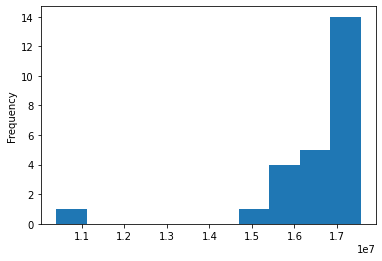

In [58]:
Thur_Pnumber['승하차총승객수'].plot.hist()

c:\Users\PC\anaconda3\envs\DC\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


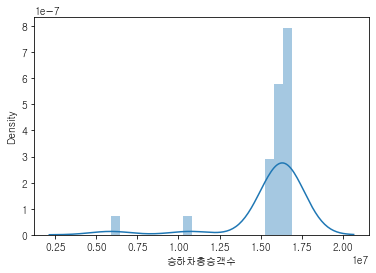

c:\Users\PC\anaconda3\envs\DC\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


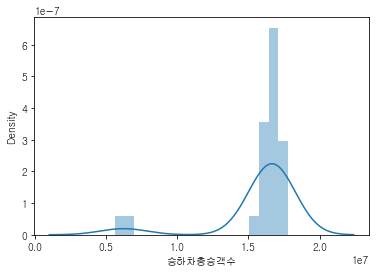

c:\Users\PC\anaconda3\envs\DC\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


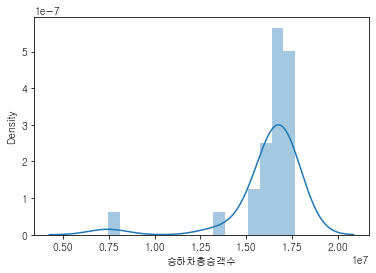

c:\Users\PC\anaconda3\envs\DC\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


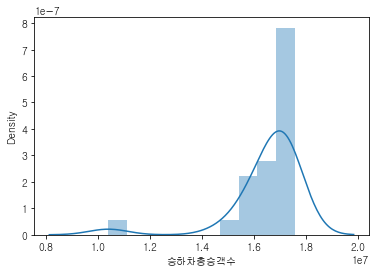

c:\Users\PC\anaconda3\envs\DC\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


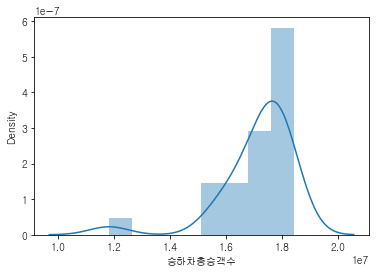

c:\Users\PC\anaconda3\envs\DC\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


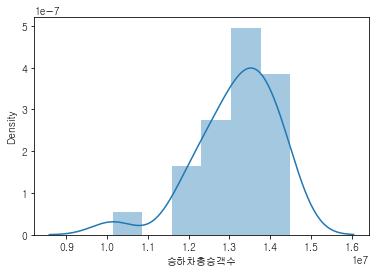

c:\Users\PC\anaconda3\envs\DC\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


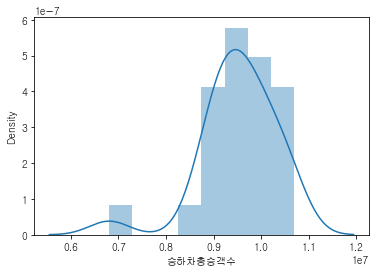

In [79]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.distplot(Mon_Pnumber['승하차총승객수'])
plt.show()
sns.distplot(Tue_Pnumber['승하차총승객수'])
plt.show()
sns.distplot(Wed_Pnumber['승하차총승객수'])
plt.show()
sns.distplot(Thur_Pnumber['승하차총승객수'])
plt.show()
sns.distplot(Fri_Pnumber['승하차총승객수'])
plt.show()
sns.distplot(Sat_Pnumber['승하차총승객수'])
plt.show()
sns.distplot(Sun_Pnumber['승하차총승객수'])
plt.show()

In [84]:
# 모든 요일의 데이터의 p-value가 0.05보다 작아 비모수 검정 
from scipy.stats import kruskal
kruskal(Mon_Pnumber['승하차총승객수'],Tue_Pnumber['승하차총승객수'],Wed_Pnumber['승하차총승객수'],Thur_Pnumber['승하차총승객수'],\
    Fri_Pnumber['승하차총승객수'],Sat_Pnumber['승하차총승객수'],Sun_Pnumber['승하차총승객수'])

# p-value = 0.0
# p-value < 0.05이기 때문에 요일별 승객수 차이가 있다고 볼 수 있음.

KruskalResult(statistic=106.49236363636373, pvalue=1.1049254324890695e-20)

In [96]:
# 모든 요일의 데이터의 p-value가 0.05보다 작아 비모수 검정 
from scipy.stats import kruskal
kruskal(Mon_Pnumber,Tue_Pnumber,Wed_Pnumber,Thur_Pnumber,\
    Fri_Pnumber,Sat_Pnumber,Sun_Pnumber)


KruskalResult(statistic=106.49236363636373, pvalue=1.1049254324890695e-20)

In [98]:
Pnum = pd.concat([Mon_Pnumber, Tue_Pnumber, Wed_Pnumber, Thur_Pnumber, Fri_Pnumber, Sat_Pnumber, Sun_Pnumber])

Pnum

승하차총승객수
사용요일 사용주            
월    2    15619172.0
     3    15330431.0
     4    15444014.0
     5    15661418.0
     6     5862840.0
...              ...
일    21   10391425.0
     22    9849500.0
     23    9082700.0
     24    9500622.0
     25    9809798.0

[175 rows x 1 columns]

In [105]:
Pnum = Pnum.reset_index()
Pnum

,index,사용요일,사용주,승하차총승객수
0,0,월,2,15619172.0
1,1,월,3,15330431.0
2,2,월,4,15444014.0
3,3,월,5,15661418.0
4,4,월,6,5862840.0
...,...,...,...,...
170,170,일,21,10391425.0
171,171,일,22,9849500.0
172,172,일,23,9082700.0
173,173,일,24,9500622.0


In [112]:
from statsmodels.sandbox.stats.multicomp import MultiComparison
import scipy.stats

comp = MultiComparison(Pnum['승하차총승객수'],Pnum['사용요일'])

# Bonferroni 방법을 통해 모든 그룹간 ttest를 진행
result = comp.allpairtest(scipy.stats.ttest_ind, method='bonf')
result[0]

group1,group2,stat,pval,pval_corr,reject
금,목,1.6022,0.1157,1.0,False
금,수,1.9358,0.0588,1.0,False
금,월,2.6798,0.0101,0.2113,False
금,일,24.1939,0.0,0.0,True
금,토,11.8024,0.0,0.0,True
금,화,2.0238,0.0486,1.0,False
목,수,0.6238,0.5357,1.0,False
목,월,1.4971,0.1409,1.0,False
목,일,21.1793,0.0,0.0,True
목,토,9.515,0.0,0.0,True


In [61]:
# 매 주마다 요일 데이터 추출
day_Pnumber = raw[['사용요일','사용주','승하차총승객수']]
day_Pnumber = day_Pnumber.groupby(['사용요일'])['사용주','승하차총승객수'].sum()
day_Pnumber = pd.DataFrame(day_Pnumber, columns=['승하차총승객수'])
day_Pnumber = day_Pnumber.reindex(['월','화','수','목','금','토','일'])
day_Pnumber



C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_20664\2579593320.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  day_Pnumber = day_Pnumber.groupby(['사용요일'])['사용주','승하차총승객수'].sum()


,승하차총승객수
사용요일,
월,391555551.0
화,411979965.0
수,421134136.0
목,428684383.0
금,445310717.0
토,341950018.0
일,247523995.0


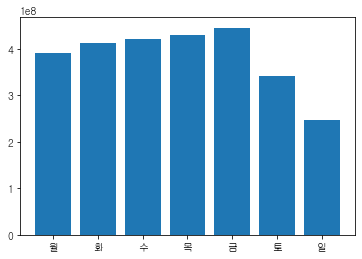

In [62]:
# 요일별 승객 수 시각화
import numpy as np

from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

x = np.arange(7)
day = day_Pnumber.index
values = day_Pnumber['승하차총승객수']

plt.bar(x, values)
plt.xticks(x, day)

plt.show()


## Q.연월 각각에 대해 일자별 승하차총승객수 시각화

2019-01


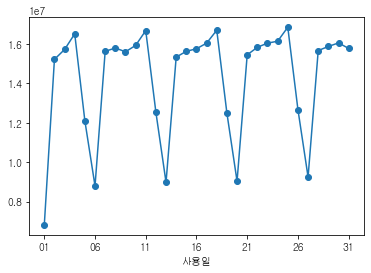

2019-02


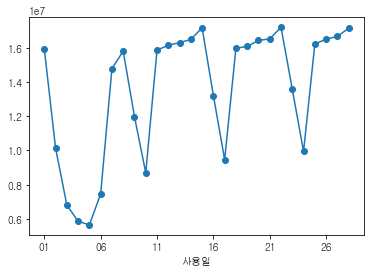

2019-03


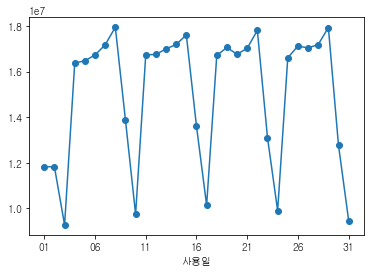

2019-04


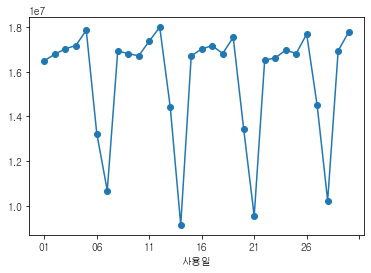

2019-05


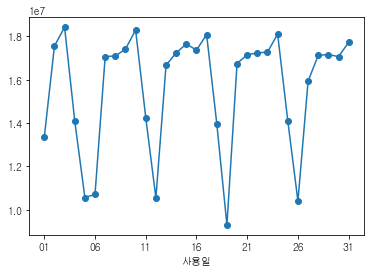

2019-06


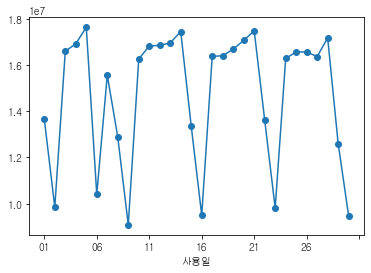

In [63]:
# 일자별 승하차총승객수 연월 각가에 대해 시각화
for i in raw['사용연월'].unique():
    print(i)
    raw[raw['사용연월']==i].groupby('사용일')['승하차총승객수'].sum().plot(marker='o')
    plt.show()